### 二値データ
#### 質的データ
定量化できず、対象がある状態やカテゴリーの項目に属しているかどうかのみを知ることができるデータを質的データと呼ぶ。
広く利用されている方法に分割表に基づく方法がある。もう1つは、回帰分析の考え方を応用した確率モデルを使う方法である。
質的データの中で最も基本的であり、かつ重要であるのは2つの状態を取る二項的な場合である。
この場合、一方の状態をとるとき1、他方の状態をとるとき0のダミー変数$Y_i$を使って観測変数を表すが、このようなデータは二値データと呼ばれている。
二値データの統計分析手法で最も広く使われているモデルにはプロビット・モデル、ロジット・モデルなどがある。

#### 二値データの確率モデル
$Y_i=1$となる確率を統計的に分析することが必要となる。

$Y_i$を$i$番目の個体に対する薬物の効果を表す変数とし、薬物によって生物が死亡する場合1、生存する場合0とする。
$Y_i=1$となる確率は、一定量を単位とした薬物の対数濃度$X_i$に影響され、濃度が高くなるに従ってその値は大きくなる。
したがって、$Y_i=1$となる確率とそれに影響を与えていると考えられる変数$X_i$との関係を求めるモデルを考え、それに基づいて質的データを分析することが考えられる。
そこで、ある$X_i$の値に対する$Y_i=1$となる確率$P_i$は、$Y_i$の$X_i$に関する条件付き確率$P(Y_i=1|X_i)$であるが、これは$X_i$の関数であって、
$$
P(Y_i=1|X_i)=F^*(X_i)
$$
と表すことができる。
最も簡単なものとして$F^*$は線形関数
$$
F^*(X_i)=\alpha_0+\alpha_1X_i
$$
とすることが考えられる。このようなモデルは線形確率モデルと呼ばれる。

$Y_i$が0をとるか1をとるかを決定する仮想的な因子$Y_i^*$があり、それが
$$
Y_i^*=\beta_0+\beta_1X_i+\varepsilon_i
$$
で表すことができるとする。ここで、$\varepsilon_i$は誤差項と呼ばれ、既知の確率分布に従う確率変数とする。
$$
Y_i=\left\{\begin{array}{ll}
1&Y_i^*>0の場合\\
0&Y_i^*\leq0の場合
\end{array}\right.
$$
と決定されるものとする。

いま、$F$を$-\varepsilon_i$の累積分布関数とする。
$Y_i=1$となるのは$-\varepsilon_i\leq \beta_0+\beta_1X_i$のときであるから、$Y_i\leq 1$となる確率は、
$$
P(Y_i=1|X_i)=F^*(X_i)=F(\beta_0+\beta_1X_i)
$$
で与えられる。
プロビット・モデルでは標準正規分布、ロジット・モデルではロジスティック分布が採用される。

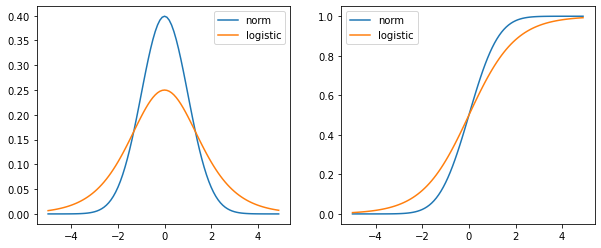

In [31]:
import numpy as np
from scipy.stats import norm, logistic
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.1)

y1 = norm.pdf(x, loc=0, scale=1)
y2 = logistic.pdf(x, loc=0, scale=1)

y_cum1 = norm.cdf(x, loc=0, scale=1)
y_cum2 = logistic.cdf(x, loc=0, scale=1)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, y1, label='norm')
plt.plot(x, y2, label='logistic')
plt.legend();

plt.subplot(1,2,2)
plt.plot(x, y_cum1, label='norm')
plt.plot(x, y_cum2, label='logistic')
plt.legend();

### ロジット・モデルとプロビット・モデル
#### プロビット・モデル
プロビット・モデルは$\varepsilon_i$が標準正規分布に従うとし、その累積分布関数
$$
\Phi(z)=\int_{-\infty}^z\frac{1}{\sqrt{2\pi}}e^{-x^2/2}dx
$$
を使い、$Y_i=1$となる確率を、
$$
F^*(X_i)=\Phi(\beta_0+\beta_1X_i)
$$
とするものである。

#### ロジット・モデル
ロジット・モデルは誤差項の確率分布がロジスティック分布であるとし、ロジスティック分布の累積分布関数
$$
\Lambda(z)=\frac{e^z}{1+e^z}
$$
を用いて、$Y_i=1$となる確率を
$$
F^*(X_i)=\Lambda(\beta_0+\beta_1X_i)
$$
とするものである。
$$
P_{0i}=P(Y_i=0|X_i),\hspace{5mm}P_{1i}=P(Y_i=1|X_i)
$$
とすると
$$
P_{0i}=1-P_{1i}=1/[1+\exp(\beta_0+\beta_1X_i)]
$$
であるから
$$
\log(P_{1i}/P_{0i})=\beta_0+\beta_1X_i
$$
となる。
すなわち、ロジット・モデルは$Y_i$が0となるか1となるかの2つの確率の比(オッズ)の対数、つまり対数オッズが$X_i$の線形関数であるとしたものである。

#### モデルの推定方法
$-\varepsilon_i$の累積分布関数を既知の関数$F(z)$とする。プロビット・モデルの場合、$F(z)$は標準正規分布の累積分布関数$\Phi(z)$であり、ロジット・モデルの場合、$F(z)$はロジスティック分布の累積分布関数$\Lambda(z)$である。
$P(Y_i=1|X_i)=F(\beta_0+\beta_1X_i)$および$P(Y_i=0|X_i)=1-F(\beta_0+\beta_1X_i)$であるから、ある標本$Y_1,\cdots,Y_n$を得る同時確率は、$Y_i=1$の場合$F(\beta_0+\beta_1X_i)$を、$Y_i=0$の場合$1-F(\beta_0+\beta_1X_i)$をあわせて$n$個乗じたものである。
この確率を$\beta_0,\beta_1$の関数と考えれば、次のような尤度関数を得ることができる。
$$
L(\beta_0,\beta_1)=\prod_{Y_i=1}F(\beta_0+\beta_1X_i)\times\prod_{Y_i=0}[1-F(\beta_0+\beta_1X_i)]
$$

最尤推定量$\hat{\beta}_0,\hat{\beta}_1$は$L(\beta_0,\beta_1)$を最大にするものであるが、この推定量は$F$を標準正規分布とした場合プロビット最尤推定量、ロジスティック分布とした場合ロジット最尤推定量とよばれる。
数学的な取り扱いを容易にするために両辺の対数を取れば
$$
\log L(\beta_0,\beta_1)=\sum_{i=1}^n\{Y_i\log F(\beta_0+\beta_1X_i)+(1-Y_i)\log[1-F(\beta_0+\beta_1X_i)]\}
$$
となる。これを最大にする推定量は
$$
\partial\log L(\beta_0,\beta_1)/\partial\beta_0=0,\hspace{4mm}\partial\log L(\beta_0,\beta_1)/\partial\beta_1=0
$$
の解として求められるが、一般に回帰分析の場合と異なり解析的にこの連立方程式の解を求めることはできない。
このため実際の推定では、ニュートン法などの標準的なアルゴリズムによって、数値計算で$\beta_0,\beta_1$の値を求めることになる。

### 確率の推定
$Y_i=1$となる確率$P_i=P(Y_i=1|X_i)$は、最尤推定量$\hat{\beta}_0,\hat{\beta}_1$を使い、
$$
\hat{P}_i=F(\hat{\beta}_0+\hat{\beta}_1X_i)
$$
で推定する。
$\hat{P}_i$の漸近分布は正規分布であり、$\hat{\beta}_0,\hat{\beta}_1$の漸近分散を$\sigma_0^2,\sigma_1^2$、漸近共分散$\sigma_{01}$、$f(z)$を$\varepsilon_i$の密度関数とすると、$\hat{P}_i$の標本分布は$n$が十分大きいときは
$$
N(P_i,f(\hat{\beta}_0+\hat{\beta}_1X_i)^2\times (\sigma_0^2+\sigma_1^2X_i^2+2\sigma_{01}X_i))
$$
で近似できる。

### 説明変数が2個以上の場合
$Y_i$が$(p+1)$個の変数$X_{1i},\cdots,X_{pi}$による場合に簡単に拡張できる。$Y_i^*$が
$$
Y_i^*=\beta_0+\beta_1X_{1i}+\cdots+\beta_pX_{pi}+\varepsilon_i
$$
で与えられ、その符号によって$Y_i$が決定されるとする。
$F$を$-\varepsilon_i$の累積分布関数とすると、$Y_i=1$となる確率は
$$
F(\beta_0+\beta_1X_{1i}+\cdots+\beta_pX_{pi})
$$
で与えられる。
したがって、尤度関数は
$$
L(\beta_0,\cdots,\beta_p)=\prod_{Y_i=0}F(\beta_0+\beta_1X_{1i}+\cdots+\beta_pX_{pi})\times \prod_{Y_i=1}[1-F(\beta_0+\beta_1X_{1i}+\cdots+\beta_pX_{pi})]
$$
であり、これを最大化することによって最尤推定量を求めることができる。
いま、
$$
\boldsymbol{\beta}=\begin{pmatrix}\beta_0\\\beta_1\\\vdots\\\beta_p\end{pmatrix},\hspace{3mm}
\boldsymbol{X}_i=\begin{pmatrix}1\\X_{1i}\\\vdots\\X_{pi}\end{pmatrix},\hspace{3mm}
\boldsymbol{0}=\begin{pmatrix}0\\0\\\vdots\\0\end{pmatrix}
$$
とし、$\boldsymbol{\hat{\beta}}$を$\boldsymbol{\beta}$の推定量である$p$次元のベクトル、$f(z)$を$F$の密度関数とすると、$\boldsymbol{\hat{\beta}}$は一致推定量であり、その漸近分布は
$$
\sqrt{n}(\boldsymbol{\hat{\beta}}-\boldsymbol{\beta})→N(\boldsymbol{0},\boldsymbol{A}^{-1})
$$
となる。ここで$\boldsymbol{A}$は
$$
\begin{align}
\boldsymbol{A}&=\lim_{n→\infty}\frac{1}{n}\sum_{i=1}^n\frac{f_i^2}{F_i(1-F_i)}\boldsymbol{X}_i\boldsymbol{X}_i'\\
F_i&=F(\boldsymbol{X}_i'\boldsymbol{\beta}),\hspace{5mm}f_i=f(\boldsymbol{X}_i'\boldsymbol{\beta})
\end{align}
$$
で与えられる。$n$が十分に大きければ、この$\boldsymbol{A}$は
$$
\begin{align}
\boldsymbol{\hat{A}}&\fallingdotseq\frac{1}{n}\sum_{i=1}^n\frac{\hat{f}_i^2}{\hat{F}_i(1-\hat{F}_i)}\boldsymbol{X}_i\boldsymbol{X}_i'\\
\hat{F}_i&=F(\boldsymbol{X}_i'\boldsymbol{\beta}),\hspace{5mm}\hat{f}_i=f(\boldsymbol{X}_i'\boldsymbol{\beta})\hspace{3mm}(f=F')
\end{align}
$$
によって求めることができる。この結果から、各$\beta_0,\beta_1,\cdots,\beta_p$について、回帰分析と同じく$t$検定を行うことができ、検定における自由度は$n-(p+1)$である。
反応の確率$P_i=P(Y_i=1|\boldsymbol{X}_i)$そのものは
$$
\hat{P}_i=F(\boldsymbol{X}_i'\boldsymbol{\hat{\beta}})
$$
で推定され、その漸近分布は
$$
\sqrt{n}(\hat{P}_i-P_i)→N(0,f_i^2\cdot \boldsymbol{X}_i'\boldsymbol{A}^{-1}\boldsymbol{X}_i)
$$
で与えられる。